<a href="https://colab.research.google.com/github/Chirag314/Randomforest-creditcarddata-H2O/blob/main/Randomforest_creditcarddata_H2O.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###This notebook is copied from exercises from book Ensemble Machine Learning Cookbook.
H2O is an open source and distributed machine learning platform that allows you to build machine learning models on large datasets. H2O supports both supervised and unsupervised algorithms and is extremely fast, scalable, and easy to implement. H2O's REST API allows us to access all its functionalities from external programs such as R and Python. H2O in Python is designed to be very similar to scikit-learn.
H2O provides us with distributed random forests, which are a powerful tool used for classification and regression tasks. This generates multiple trees, rather than single trees. In a distributed random forest, we use the average predictions of both the classification and regression models to reach a final result

In [ ]:
#Java is an absolute must for H2O to run. Make sure you have Java installed with the following command in Jupyter:

In [1]:
! apt-get install default-jre
! java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
default-jre set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
openjdk version "11.0.16" 2022-07-19
OpenJDK Runtime Environment (build 11.0.16+8-post-Ubuntu-0ubuntu118.04)
OpenJDK 64-Bit Server VM (build 11.0.16+8-post-Ubuntu-0ubuntu118.04, mixed mode, sharing)


In [2]:
#Install H2O
! pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 177.1 MB 38 kB/s 
  Created wheel for h2o: filename=h2o-3.36.1.4-py2.py3-none-any.whl size=177128127 sha256=b3b019fa51ec0bf7d67762e435ccd33f4c0c00776d38e34d05f32e49d73a8e3a
  Stored in directory: /root/.cache/pip/wheels/02/f9/18/5fbae4db903beda26f764b6e035cb41b37713fed8a6b9cd403
Successfully built h2o


In [3]:
#import required libraries
import h2o
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline

from h2o.estimators.random_forest import H2ORandomForestEstimator
from sklearn import metrics

In [4]:
#To use H2O, we need to initialize an instance and connect to it. We can do that as follows
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.16" 2022-07-19; OpenJDK Runtime Environment (build 11.0.16+8-post-Ubuntu-0ubuntu118.04); OpenJDK 64-Bit Server VM (build 11.0.16+8-post-Ubuntu-0ubuntu118.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpqz7xaoqu
  JVM stdout: /tmp/tmpqz7xaoqu/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpqz7xaoqu/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.4
H2O_cluster_version_age:,1 month and 7 days
H2O_cluster_name:,H2O_from_python_unknownUser_pzxs5a
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [5]:
# Read data from github. Use raw format and copy url# Note normal url and raw url will be different.
import pandas as pd
pd.options.display.max_rows=None
pd.options.display.max_columns=None
url = 'https://raw.githubusercontent.com/PacktPublishing/Ensemble-Machine-Learning-Cookbook/master/Chapter06/UCI_Credit_Card.csv'
df_creditcarddata = pd.read_csv(url)
#df = pd.read_csv(url)
print(df_creditcarddata.head(5))

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0     -2     -2     3913.0     3102.0      689.0        0.0        0.0   
1      0      2     2682.0     1725.0     2682.0     3272.0     3455.0   
2      0      0    29239.0    14027.0    13559.0    14331.0    14948.0   
3      0      0    46990.0    48233.0    49291.0    28314.0    28959.0   
4      0      0     8617.0     5670.0    35835.0    20940.0    19146.0   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0   

In [6]:
#We change our pandas DataFrame to an H2O DataFrame
hf_creditcarddata=h2o.H2OFrame(df_creditcarddata)
hf_creditcarddata.head()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,100000,2,2,2,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0
9,140000,2,3,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0
10,20000,1,3,2,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0


In [7]:
hf_creditcarddata.describe()

Rows:30000
Cols:25




,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
type,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int
mins,1.0,10000.0,1.0,0.0,0.0,21.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-165580.0,-69777.0,-157264.0,-170000.0,-81334.0,-339603.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,15000.5,167484.32266666702,1.6037333333333341,1.8531333333333406,1.551866666666661,35.48549999999951,-0.01670000000000008,-0.13376666666666645,-0.16619999999999988,-0.2206666666666661,-0.2662000000000006,-0.2910999999999984,51223.33090000027,49179.07516666643,47013.1547999997,43262.94896666664,40311.40096666685,38871.760399999795,5663.580500000035,5921.163499999985,5225.681499999979,4826.076866666658,4799.387633333337,5215.502566666659,0.2212
maxs,30000.0,1000000.0,2.0,6.0,3.0,79.0,8.0,8.0,8.0,8.0,8.0,8.0,964511.0,983931.0,1664089.0,891586.0,927171.0,961664.0,873552.0,1684259.0,896040.0,621000.0,426529.0,528666.0,1.0
sigma,8660.398374208891,129747.66156720248,0.4891291960902599,0.7903486597207285,0.5219696006132472,9.217904068090148,1.1238015279973328,1.1971859730345495,1.1968675684465677,1.169138622402336,1.133187406002751,1.1499876256078958,73635.86057552972,71173.76878252828,69349.38742703683,64332.85613391641,60797.15577026471,59554.107536745854,16563.280354025774,23040.870402057197,17606.961469803096,15666.15974403206,15278.30567914475,17777.465775435325,0.41506180569093337
zeros,0,0,0,14,54,0,14737,15730,15764,16455,16947,16286,2008,2506,2870,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,1.0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2.0,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3.0,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0


In [9]:
#Drop ID column
hf_creditcarddata=hf_creditcarddata.drop(['ID'],axis=1)

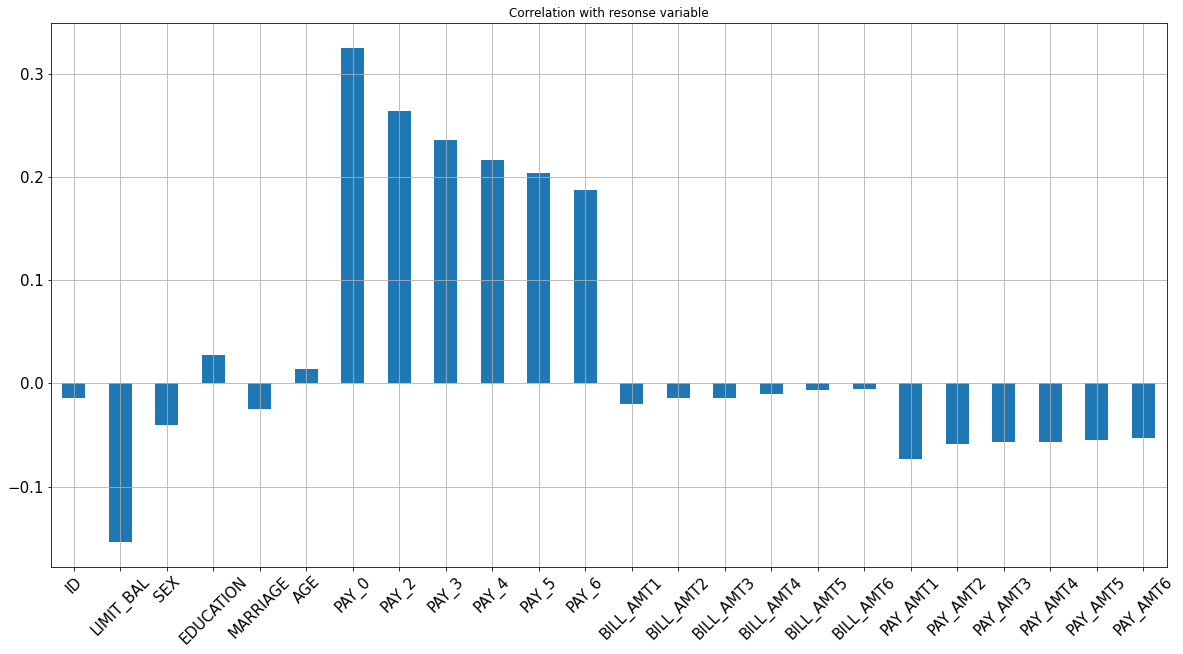

In [11]:
# checkthe correlation of each of our feature variables with the target variable
df_creditcarddata.drop(['default.payment.next.month'],axis=1).corrwith(df_creditcarddata['default.payment.next.month']).plot.bar(figsize=(20,10),title='Correlation with resonse variable',fontsize=15,rot=45,grid=True)

In [12]:
# Lets check selected data
hf_creditcarddata.types

{'LIMIT_BAL': 'int',
 'SEX': 'int',
 'EDUCATION': 'int',
 'MARRIAGE': 'int',
 'AGE': 'int',
 'PAY_0': 'int',
 'PAY_2': 'int',
 'PAY_3': 'int',
 'PAY_4': 'int',
 'PAY_5': 'int',
 'PAY_6': 'int',
 'BILL_AMT1': 'int',
 'BILL_AMT2': 'int',
 'BILL_AMT3': 'int',
 'BILL_AMT4': 'int',
 'BILL_AMT5': 'int',
 'BILL_AMT6': 'int',
 'PAY_AMT1': 'int',
 'PAY_AMT2': 'int',
 'PAY_AMT3': 'int',
 'PAY_AMT4': 'int',
 'PAY_AMT5': 'int',
 'PAY_AMT6': 'int',
 'default.payment.next.month': 'int'}

In [13]:
#We notice that they are all of the integer datatype. We will convert them to factor type, which is categorical in nature
hf_creditcarddata['SEX']=hf_creditcarddata['SEX'].asfactor()
hf_creditcarddata['EDUCATION'] = hf_creditcarddata['EDUCATION'].asfactor()
hf_creditcarddata['MARRIAGE'] = hf_creditcarddata['MARRIAGE'].asfactor()
hf_creditcarddata['PAY_0'] = hf_creditcarddata['PAY_0'].asfactor()
hf_creditcarddata['PAY_2'] = hf_creditcarddata['PAY_2'].asfactor()
hf_creditcarddata['PAY_3'] = hf_creditcarddata['PAY_3'].asfactor()
hf_creditcarddata['PAY_4'] = hf_creditcarddata['PAY_4'].asfactor()
hf_creditcarddata['PAY_5'] = hf_creditcarddata['PAY_5'].asfactor()
hf_creditcarddata['PAY_6'] = hf_creditcarddata['PAY_6'].asfactor()


#####We will encode the binary target variable as a factor type variable:

In [15]:
#Select feature and target variables
predictors=['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
target='default.payment.next.month'

In [17]:
#We now split the H2O DataFrame into training and testing subsets. We use 70% of our data for training the model and the remaining 30% for validation
splits=hf_creditcarddata.split_frame(ratios=[0.7],seed=123)
train=splits[0]
test=splits[1]

In [18]:
# We build our random forest model with the default settings. You can check the model performance on the test data with the following commands
from h2o.estimators.random_forest import H2ORandomForestEstimator
rf_d=H2ORandomForestEstimator(model_id='rf_d',seed=123)
rf_d.train(x=predictors,y=target,training_frame=train)
print(rf_d.model_performance(test))

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%

ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.13387216778722294
RMSE: 0.3658854571955859
LogLoss: 0.42849253385280256
Mean Per-Class Error: 0.29384431461049565
AUC: 0.7741373806920644
AUCPR: 0.546121349585149
Gini: 0.5482747613841288

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.31602574632926417: 


,,0,1,Error,Rate
0,0,6050.0,930.0,0.1332,(930.0/6980.0)
1,1,873.0,1048.0,0.4545,(873.0/1921.0)
2,Total,6923.0,1978.0,0.2026,(1803.0/8901.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.316026,0.537574,191.0
1,max f2,0.121954,0.625563,313.0
2,max f0point5,0.479263,0.569341,133.0
3,max accuracy,0.537636,0.823278,115.0
4,max precision,0.989624,1.000000,0.0
5,max recall,0.001277,1.000000,399.0
6,max specificity,0.989624,1.000000,0.0
7,max absolute_mcc,0.366460,0.413855,171.0
8,max min_per_class_accuracy,0.201151,0.699713,254.0
9,max mean_per_class_accuracy,0.245508,0.710759,226.0



Gains/Lift Table: Avg response rate: 21.58 %, avg score: 22.83 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010111,0.851048,3.964237,3.964237,0.855556,0.896461,0.855556,0.896461,0.040083,0.040083,296.423738,296.423738,0.038221
1,2,0.020110,0.802715,3.592283,3.779299,0.775281,0.822570,0.815642,0.859722,0.035919,0.076002,259.228281,277.929907,0.071274
2,3,0.030109,0.762671,3.279910,3.613457,0.707865,0.782373,0.779851,0.834035,0.032795,0.108798,227.991039,261.345731,0.100345
3,4,0.040108,0.728130,3.123724,3.491367,0.674157,0.745233,0.753501,0.811897,0.031234,0.140031,212.372418,249.136698,0.127424
4,5,0.050107,0.697162,3.227848,3.438781,0.696629,0.711150,0.742152,0.791792,0.032275,0.172306,222.784832,243.878142,0.155830
5,6,0.100101,0.558973,2.988363,3.213825,0.644944,0.627920,0.693603,0.709948,0.149401,0.321707,198.836280,221.382487,0.282596
6,7,0.150095,0.428290,2.103308,2.843930,0.453933,0.491822,0.613772,0.637294,0.105154,0.426861,110.330762,184.392953,0.352936
7,8,0.200090,0.342659,1.686811,2.554812,0.364045,0.383597,0.551376,0.573905,0.084331,0.511192,68.681106,155.481234,0.396722
8,9,0.300079,0.244599,1.197428,2.102520,0.258427,0.287693,0.453763,0.478537,0.119729,0.630921,19.742760,110.252016,0.421896
9,10,0.400067,0.194957,0.806962,1.778722,0.174157,0.217862,0.383881,0.413387,0.080687,0.711609,-19.303792,77.872159,0.397282


In [21]:
from h2o.estimators.uplift_random_forest import H2OUpliftRandomForestEstimator
#We can apply cross-validation by passing nfolds as a parameter to H2ORandomForestEstimator():
rf_cv = H2ORandomForestEstimator(model_id = 'RF_cv', 
                                 seed = 12345, 
                                 ntrees = 500, 
                                 sample_rate = 0.9, 
                                 col_sample_rate_per_tree = 0.9, 
                                 nfolds = 10)
                                            

rf_cv.train(x=predictors,y=target,training_frame=train)
print(rf_cv.model_performance(test))

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%

ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.13261838370058013
RMSE: 0.3641680706769611
LogLoss: 0.42411976317876826
Mean Per-Class Error: 0.29063506351903035
AUC: 0.7788260576436878
AUCPR: 0.5532449693495977
Gini: 0.5576521152873757

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3109575499217301: 


,,0,1,Error,Rate
0,0,6073.0,907.0,0.1299,(907.0/6980.0)
1,1,867.0,1054.0,0.4513,(867.0/1921.0)
2,Total,6940.0,1961.0,0.1993,(1774.0/8901.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.310958,0.543019,195.0
1,max f2,0.149399,0.635434,296.0
2,max f0point5,0.480145,0.575082,130.0
3,max accuracy,0.480145,0.823840,130.0
4,max precision,0.981559,1.000000,0.0
5,max recall,0.017552,1.000000,397.0
6,max specificity,0.981559,1.000000,0.0
7,max absolute_mcc,0.377996,0.420571,167.0
8,max min_per_class_accuracy,0.196702,0.698594,259.0
9,max mean_per_class_accuracy,0.280724,0.712647,210.0



Gains/Lift Table: Avg response rate: 21.58 %, avg score: 22.75 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010111,0.838656,4.067205,4.067205,0.877778,0.885722,0.877778,0.885722,0.041124,0.041124,306.720458,306.720458,0.039548
1,2,0.020110,0.778585,3.488159,3.779299,0.752809,0.806047,0.815642,0.846107,0.034878,0.076002,248.815867,277.929907,0.071274
2,3,0.030109,0.735183,3.436097,3.665325,0.741573,0.754008,0.791045,0.815522,0.034357,0.110359,243.609660,266.532512,0.102336
3,4,0.040108,0.702105,3.071662,3.517325,0.662921,0.718540,0.759104,0.791345,0.030713,0.141072,207.166211,251.732510,0.128751
4,5,0.050107,0.674285,3.175786,3.449170,0.685393,0.688727,0.744395,0.770867,0.031754,0.172827,217.578625,244.917049,0.156494
5,6,0.100101,0.552739,2.853001,3.151421,0.615730,0.614719,0.680135,0.692881,0.142634,0.315461,185.300142,215.142050,0.274630
6,7,0.150095,0.422552,2.353206,2.885548,0.507865,0.483222,0.622754,0.623047,0.117647,0.433108,135.320555,188.554801,0.360901
7,8,0.200090,0.338102,1.676399,2.583430,0.361798,0.377486,0.557552,0.561691,0.083811,0.516918,67.639865,158.343040,0.404024
8,9,0.300079,0.238232,1.108922,2.092112,0.239326,0.281840,0.451516,0.468442,0.110880,0.627798,10.892209,109.211164,0.417913
9,10,0.400067,0.191009,0.817374,1.773517,0.176404,0.212623,0.382758,0.404506,0.081728,0.709526,-18.262551,77.351685,0.394627


In [31]:
#We can also apply a grid search to extract the best model from the given options. We set our options as follows:
search_criteria={'strategy':"RandomDiscrete"}
hyper_params={'sample_rate':[0.5,0.6,0.7],
              'col_sample_rate_per_tree':[0.7,0.8,0.9],
              'max_depth':[3,5,7]}

In [32]:
#build the model with the preceding search parameters:
from h2o.grid.grid_search import H2OGridSearch

RF_Grid = H2OGridSearch(
                    H2ORandomForestEstimator(
                        model_id = 'RF_Grid', 
                        ntrees = 200, 
                        nfolds = 10,
                        stopping_metric = 'AUC', 
                        stopping_rounds = 25), 
                    search_criteria = search_criteria, # full grid search
                    hyper_params = hyper_params)
RF_Grid.train(x = predictors, y = target, training_frame = train)

drf Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%
      col_sample_rate_per_tree  max_depth  sample_rate  \
0                          0.9        7.0          0.6   
1                          0.9        7.0          0.7   
2                          0.9        7.0          0.5   
3                          0.8        7.0          0.6   
4                          0.8        7.0          0.5   
5                          0.8        7.0          0.7   
6                          0.7        7.0          0.6   
7                          0.7        7.0          0.5   
8                          0.7        7.0          0.7   
9                          0.9        5.0          0.6   
10                         0.8        5.0          0.6   
11                         0.7        5.0          0.5   
12                         0.8        5.0          0.5   
13                         0.9        5.0          0.7   
14                         0.8     

In [33]:
# Sort all models by AUC indescending manner and pick the first model which has highest AUC
rf_grid_sorted=RF_Grid.get_grid(sort_by='auc',decreasing=True)
print(rf_grid_sorted)

best_rf_model=rf_grid_sorted.model_ids[0]
best_rf_from_rf_grid=h2o.get_model(best_rf_model)

      col_sample_rate_per_tree  max_depth  sample_rate  \
0                          0.9        7.0          0.6   
1                          0.9        7.0          0.7   
2                          0.7        7.0          0.7   
3                          0.8        7.0          0.6   
4                          0.7        7.0          0.5   
5                          0.7        7.0          0.6   
6                          0.8        7.0          0.7   
7                          0.8        7.0          0.5   
8                          0.9        7.0          0.5   
9                          0.7        5.0          0.5   
10                         0.8        5.0          0.6   
11                         0.9        5.0          0.5   
12                         0.9        5.0          0.6   
13                         0.7        5.0          0.6   
14                         0.8        5.0          0.7   
15                         0.8        5.0          0.5   
16            

In [34]:
# we apply best model to test data
best_rf_from_rf_grid.model_performance(test)


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.13259904651092377
RMSE: 0.3641415198942902
LogLoss: 0.4254250416880812
Mean Per-Class Error: 0.2873035026826107
AUC: 0.7822300347986141
AUCPR: 0.5570747495787242
Gini: 0.5644600695972282

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.24646356681765536: 


,,0,1,Error,Rate
0,0,5956.0,1024.0,0.1467,(1024.0/6980.0)
1,1,822.0,1099.0,0.4279,(822.0/1921.0)
2,Total,6778.0,2123.0,0.2074,(1846.0/8901.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.246464,0.543521,221.0
1,max f2,0.136393,0.634825,323.0
2,max f0point5,0.401070,0.580377,150.0
3,max accuracy,0.450875,0.824963,132.0
4,max precision,0.856634,1.000000,0.0
5,max recall,0.067088,1.000000,398.0
6,max specificity,0.856634,1.000000,0.0
7,max absolute_mcc,0.391526,0.418792,155.0
8,max min_per_class_accuracy,0.182084,0.711088,269.0
9,max mean_per_class_accuracy,0.210735,0.719260,244.0



Gains/Lift Table: Avg response rate: 21.58 %, avg score: 22.01 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010111,0.750458,3.964237,3.964237,0.855556,0.776400,0.855556,0.776400,0.040083,0.040083,296.423738,296.423738,0.038221
1,2,0.020110,0.732251,3.644345,3.805185,0.786517,0.741026,0.821229,0.758812,0.036439,0.076523,264.434488,280.518468,0.071938
2,3,0.030109,0.690311,3.488159,3.699904,0.752809,0.712590,0.798507,0.743462,0.034878,0.111400,248.815867,269.990366,0.103664
3,4,0.040108,0.655953,3.436097,3.634137,0.741573,0.672430,0.784314,0.725754,0.034357,0.145757,243.609660,263.413663,0.134726
4,5,0.050107,0.626646,3.279910,3.563450,0.707865,0.640877,0.769058,0.708816,0.032795,0.178553,227.991039,256.345023,0.163796
5,6,0.100101,0.523621,2.915476,3.239827,0.629213,0.566047,0.699214,0.637512,0.145757,0.324310,191.547590,223.982669,0.285915
6,7,0.150095,0.373016,2.197019,2.892484,0.474157,0.440778,0.624251,0.571983,0.109839,0.434149,119.701934,189.248442,0.362229
7,8,0.200090,0.278637,1.593099,2.567821,0.343820,0.325550,0.554183,0.510409,0.079646,0.513795,59.309933,156.782055,0.400041
8,9,0.300079,0.208748,1.285933,2.140685,0.277528,0.239151,0.461999,0.420024,0.128579,0.642374,28.593312,114.068471,0.436500
9,10,0.400067,0.175713,0.817374,1.809950,0.176404,0.191639,0.390621,0.362943,0.081728,0.724102,-18.262551,80.995006,0.413214


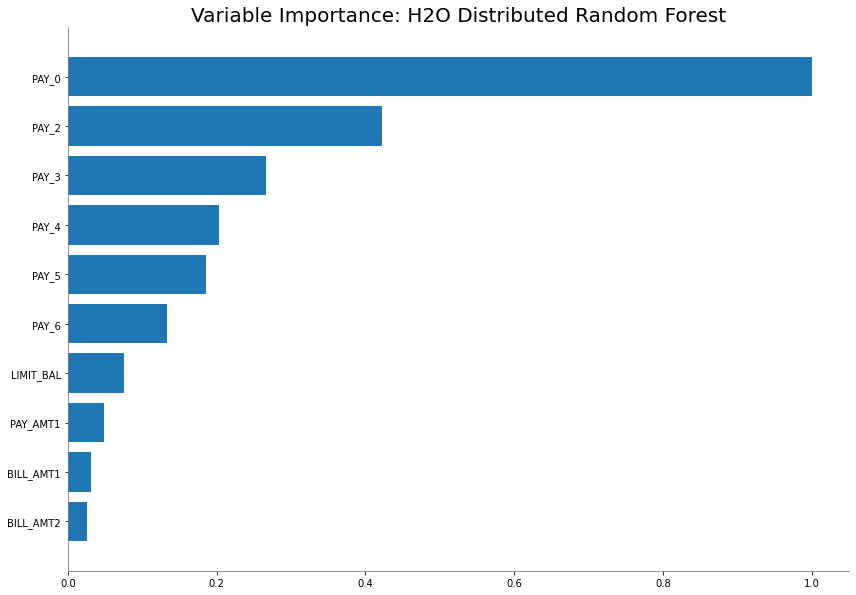

<Figure size 432x288 with 0 Axes>

In [35]:
#plot variable importance
best_rf_from_rf_grid.varimp_plot()